In [ ]:
!pip install openweathermapy

In [ ]:
!pip install csv


In [ ]:
!pip install progressbar

In [ ]:
!pip install citipy

In [1]:


# Dependencies
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from datetime import datetime
from citipy import citipy
from progressbar import ProgressBar



## Generate Cities List

In [2]:
# latitude range is (-90,90) longitude range is (-180,180)
lat_coord = np.random.uniform(-90,91,700)
lng_coord = np.random.uniform(-180,181,700)

In [4]:

weather_df = pd.DataFrame()
weather_df['city_name'] = ''
weather_df['country_code'] = ''
weather_df['latitude'] = ''
weather_df['longitude'] = ''

bar = ProgressBar()
for i in bar(range(len(lat_coord))):
    weather_df.set_value(i,'city_name',citipy.nearest_city(lat_coord[i], lng_coord[i]).city_name)
    weather_df.set_value(i,'country_code',citipy.nearest_city(lat_coord[i], lng_coord[i]).country_code)
    weather_df.set_value(i,'latitude',round(lat_coord[i],4))
    weather_df.set_value(i,'longitude',round(lng_coord[i],4))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and wi

In [5]:
weather_df.head()

,city_name,country_code,latitude,longitude
0,provideniya,ru,63.1043,-174.88
1,ajdabiya,ly,31.1936,20.7149
2,hobart,au,-78.3202,150.882
3,nikolskoye,ru,48.3922,171.541
4,cherskiy,ru,76.9608,161.878


In [6]:
# Create settings dictionary with information we're interested in
api_key = "17db9e1af5acb7f2c237c56cb9715905"

settings = {"units": "imperial", "appid": api_key}

In [8]:
weather_df['date'] = ''
weather_df['max_temp'] = ''
weather_df['humidity'] = ''
weather_df['cloudiness'] = ''
weather_df['wind_speed'] = ''

to_csv1 = []
to_csv2 = []

count = 1
url = 'http://api.openweathermap.org/data/2.5/weather?'

progress = ProgressBar(len(lat_coord)).start()
for index, row in weather_df.iterrows():
    try:
        weather_data = ow.get_current("{},{}".format(row['city_name'],
            row['country_code']),**settings)

        weather_df.set_value(index, 'date', weather_data('dt'))
        weather_df.set_value(index, 'max_temp', weather_data('main.temp_max'))
        weather_df.set_value(index, 'humidity', weather_data('main.humidity'))
        weather_df.set_value(index, 'cloudiness', weather_data('clouds.all'))
        weather_df.set_value(index, 'wind_speed', weather_data('wind.speed'))

        to_csv1.append("Record {} of {} | {}"\
            .format(count, len(weather_df), row['city_name']))
        to_csv2.append("{}APPID={}&units={}&q={},{}"\
            .format(url, api_key, settings['units'], row['city_name'], row['country_code']))

        count += 1
        progress.update(index+1)

    except:
        weather_df.set_value(index, 'date', np.nan)
        weather_df.set_value(index, 'max_temp', np.nan)
        weather_df.set_value(index, 'humidity', np.nan)
        weather_df.set_value(index, 'cloudiness', np.nan)
        weather_df.set_value(index, 'wind_speed', np.nan)

        count += 1
        progress.update(index+1)

progress.finish()

# write data url's to csv
csv_out = open('data_urlPaths.csv','w')
writer = csv.writer(csv_out)
for row in zip(to_csv1,to_csv2):
    writer.writerow(row)
csv_out.close()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Program Files (x86)\Microsoft Visual Studio\Shared\An

In [9]:
weather_df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,provideniya,ru,63.1043,-174.88,1540304066,36.19,100,68,14
1,ajdabiya,ly,31.1936,20.7149,1540304066,69.26,73,48,11.99
2,hobart,au,-78.3202,150.882,1540303200,48.2,57,0,13.87
3,nikolskoye,ru,48.3922,171.541,1540301400,42.8,81,90,11.18
4,cherskiy,ru,76.9608,161.878,1540304619,8.38,88,88,3.71


In [10]:
# remove nan rows
weather_df = weather_df.dropna()
weather_df.count()

city_name       606
country_code    606
latitude        606
longitude       606
date            606
max_temp        606
humidity        606
cloudiness      606
wind_speed      606
dtype: int64

In [11]:
weather_df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,provideniya,ru,63.1043,-174.88,1540304066,36.19,100,68,14
1,ajdabiya,ly,31.1936,20.7149,1540304066,69.26,73,48,11.99
2,hobart,au,-78.3202,150.882,1540303200,48.2,57,0,13.87
3,nikolskoye,ru,48.3922,171.541,1540301400,42.8,81,90,11.18
4,cherskiy,ru,76.9608,161.878,1540304619,8.38,88,88,3.71


In [ ]:
#weather_df.to_csv('./data/city_weather_data.csv', index_label='city_id')
#weather_df.to_csv =("../Resources/cities.csv" , index_label = 'City_id')

In [12]:
plot_date = datetime.fromtimestamp(weather_df['date'][0])\
                    .strftime('%Y-%m-%d %H:%M:%S').split()[0]

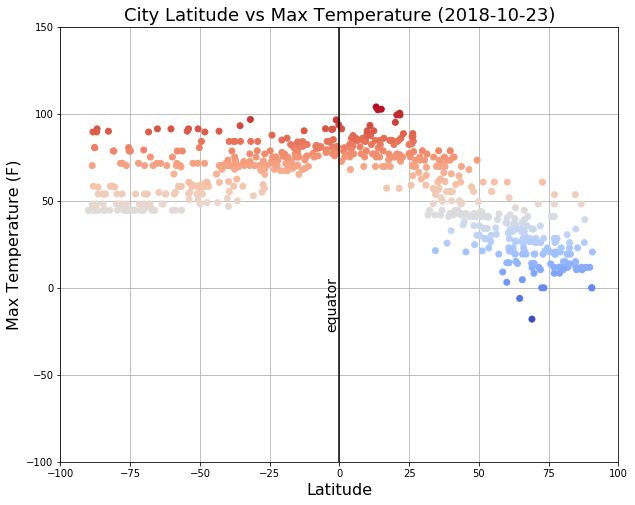

In [14]:
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['latitude'],weather_df['max_temp'], 
            c=weather_df['max_temp'], cmap=plt.cm.coolwarm, zorder=2)

# fig.colorbar(scatter)

ax.set_title('City Latitude vs Max Temperature ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Max Temperature (F)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-100,150)
ax.vlines(0,-100,150)
ax.text(-5,0,'equator', rotation=90, fontdict={"fontsize":14})
ax.grid()

plt.savefig('../images/max_temp.png')
plt.show()

## Perform API Calls

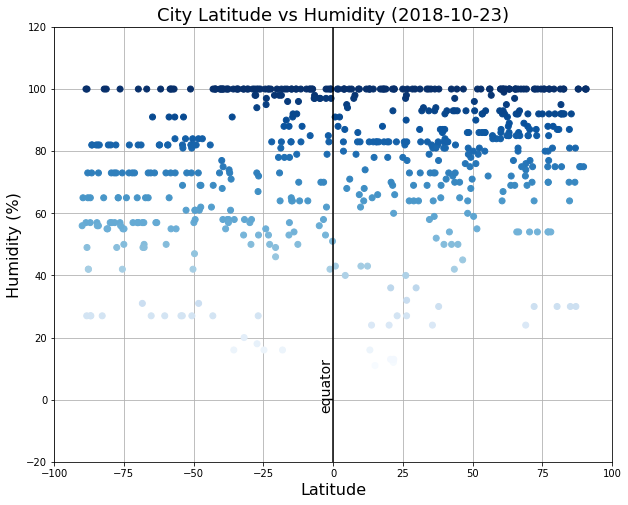

In [15]:
ig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['humidity'],
           c=weather_df['humidity'], cmap=plt.cm.Blues, zorder=2)


ax.set_title('City Latitude vs Humidity ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Humidity (%)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-20,120)
ax.vlines(0,-20,120)
ax.text(-5, 10,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
#plt.savefig('../images/humidity.png')
plt.show()


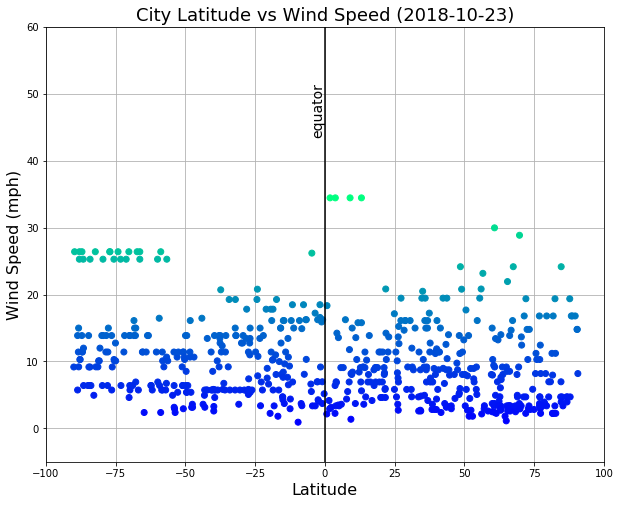

In [16]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['wind_speed'],
           c=weather_df['wind_speed'], cmap=plt.cm.winter, zorder=2) 

ax.set_title('City Latitude vs Wind Speed ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Wind Speed (mph)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-5,60)
ax.vlines(0,-5,60)
ax.text(-5,50,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/wind_speed.png')
plt.show()

In [ ]:
The closer you get to the equator the warmer it gets regardless of Earth's tilt. Earth's tilt will change the weather for either [> 0 degrees latitude >] positions on Earth, effectively creating seasons. 
The equator seems to have less wind speed than other locations on Earth but the difference is minimal.
Cloudiness and humidity ranges in cities aren't affected by their proximity to the earth's equator. I would assume that those values are affected by their closeness to bodies of water, this is only a hypothesis and needs to be explored further.